## **Exploratory Data Analysis**

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Data preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Modeling
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc
)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset from a CSV file
df = pd.read_csv("cleaned_merged_heart_dataset.csv")

In [ ]:
# Display the number of rows and columns in the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the first 5 rows of the dataset
df.head()

The dataset contains 1888 rows and 14 columns.


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Mapping numerical values to more readable text labels
df["sex"] = df["sex"].map({1: "Male", 0: "Female"})
df["cp"] = df["cp"].map({0: "Typical angina", 1: "Atypical angina", 2: "Non-anginal pain", 3: "Asymptomatic"})
df["fbs"] = df["fbs"].map({1: True, 0: False})
df["restecg"] = df["restecg"].map({0: "Normal", 1: "ST-T wave abnormality", 2: "Left ventricular hypertrophy"})
df["exang"] = df["exang"].map({1: "Yes", 0: "No"})
df["slope"] = df["slope"].map({0: "Upsloping", 1: "Flat", 2: "Downsloping"})
df["ca"] = df["ca"].map({0: "0", 1: "1", 2: "2", 3: "3"})
df["thal"] = df["thal"].map({1: "Normal", 2: "Fixed defect", 3: "Reversible defect"})

# Display the first 5 rows after the changes
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-anginal pain,130,250,False,ST-T wave abnormality,187,No,3.5,Upsloping,0,Fixed defect,1
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Fixed defect,1
3,56,Male,Atypical angina,120,236,False,ST-T wave abnormality,178,No,0.8,Downsloping,0,Fixed defect,1
4,57,Female,Typical angina,120,354,False,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,Fixed defect,1


In [ ]:
# Display information about the dataset, including data types and number of missing values
display(df.info())
print('\n')

# Display descriptive statistics for numerical variables (mean, standard deviation, min, max, percentiles)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   object 
 2   cp        1758 non-null   object 
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   bool   
 6   restecg   1888 non-null   object 
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   object 
 9   oldpeak   1888 non-null   float64
 10  slope     1870 non-null   object 
 11  ca        1860 non-null   object 
 12  thal      1758 non-null   object 
 13  target    1888 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 193.7+ KB


None

,age,trestbps,chol,thalachh,oldpeak,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,131.549258,246.855403,149.424258,1.053761,0.517479
std,9.081505,17.556985,51.609329,23.006153,1.161344,0.499827
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.750000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,55.000000,130.000000,241.000000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [ ]:
# Select numerical variables from the dataset
numeric_variables = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

# Remove the target variable from the list of numerical variables
numeric_variables.remove('target')

# Define the target variable
target_variable = 'target'

# Select categorical variables (object and boolean types)
categorical_variables = df.select_dtypes(include=['object', 'bool']).columns.to_list()

# Check whether the number of numeric, categorical, and target variables matches the total number of columns in the dataset
if len(numeric_variables) + len(categorical_variables) + 1 == df.shape[1]:
  print(f"Numeric variables: {numeric_variables}")
  print(f"Categorical variables: {categorical_variables}")
  print(f"Target variable: {target_variable}")
else:
  print("Something went wrong, missing variables")

Numeric variables: ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']
Categorical variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Target variable: target


In [ ]:
# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())

# Remove rows with missing data
df = df.dropna()

# Display the number of rows after removing missing values
print(f"\nAfter removing NAs, the dataset has {df.shape[0]} rows")

Missing values per column:
 age           0
sex           0
cp          130
trestbps      0
chol          0
fbs           0
restecg       0
thalachh      0
exang         0
oldpeak       0
slope        18
ca           28
thal        130
target        0
dtype: int64

After removing NAs, the dataset has 1674 rows


In [ ]:
# Check the number of duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
df = df[~df.duplicated()]

# Display the number of rows after removing duplicates
print(f"Without duplicates, the dataset has {df.shape[0]} rows")

Number of duplicate rows: 1255
Without duplicates, the dataset has 419 rows


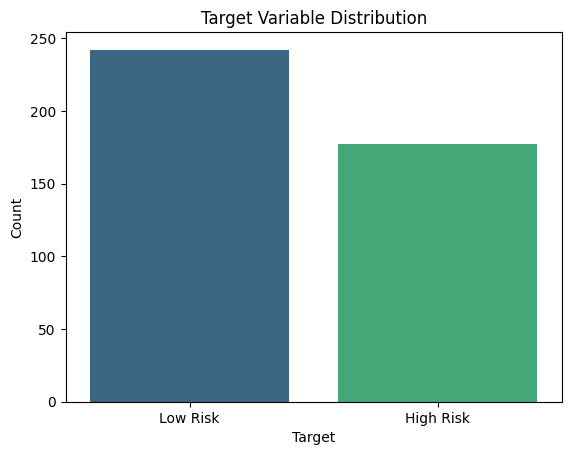

Target variable distribution:
 target
0    57.756563
1    42.243437
Name: proportion, dtype: float64


In [ ]:
# Create a count plot for the target variable ('target')
sns.countplot(x='target', data=df, palette='viridis')

# Add a title to the plot
plt.title('Target Variable Distribution')

# Set labels for the X and Y axes
plt.xlabel('Target')
plt.ylabel('Count')

# Set X axis labels (0 - low risk, 1 - high risk)
plt.xticks(ticks=[0, 1], labels=['Low Risk', 'High Risk'])

# Display the plot
plt.show()

# Calculate and display the percentage distribution of the 'target' variable
target_distribution = df['target'].value_counts(normalize=True) * 100
print("Target variable distribution:\n", target_distribution)

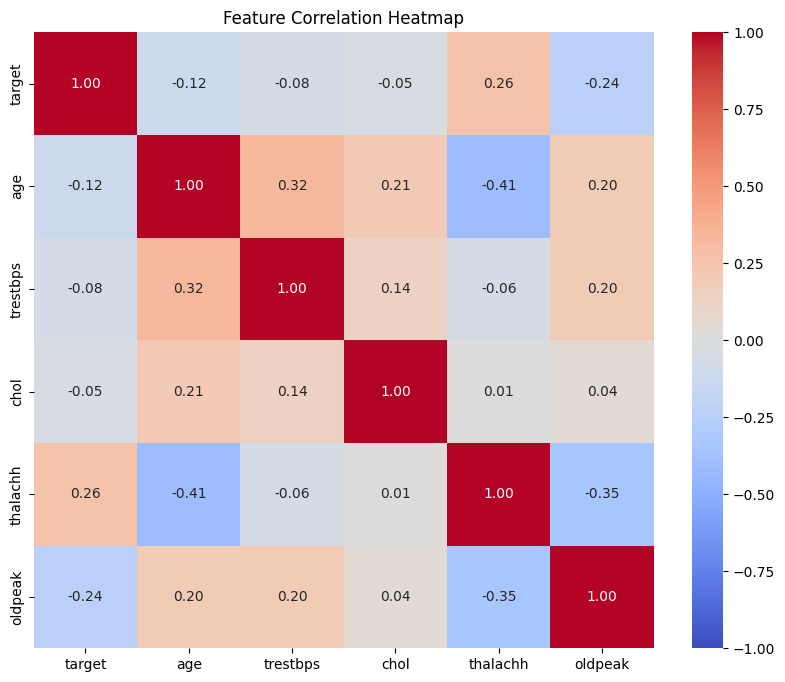

In [ ]:
# Calculate the correlation matrix for the target variable and numerical variables
correlation_matrix = df[[target_variable]+numeric_variables].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))

# Draw the heatmap with correlation values, setting the format to 2 decimal places
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmax=1, vmin=-1)

# Add a title to the plot
plt.title('Feature Correlation Heatmap')

# Display the plot
plt.show()

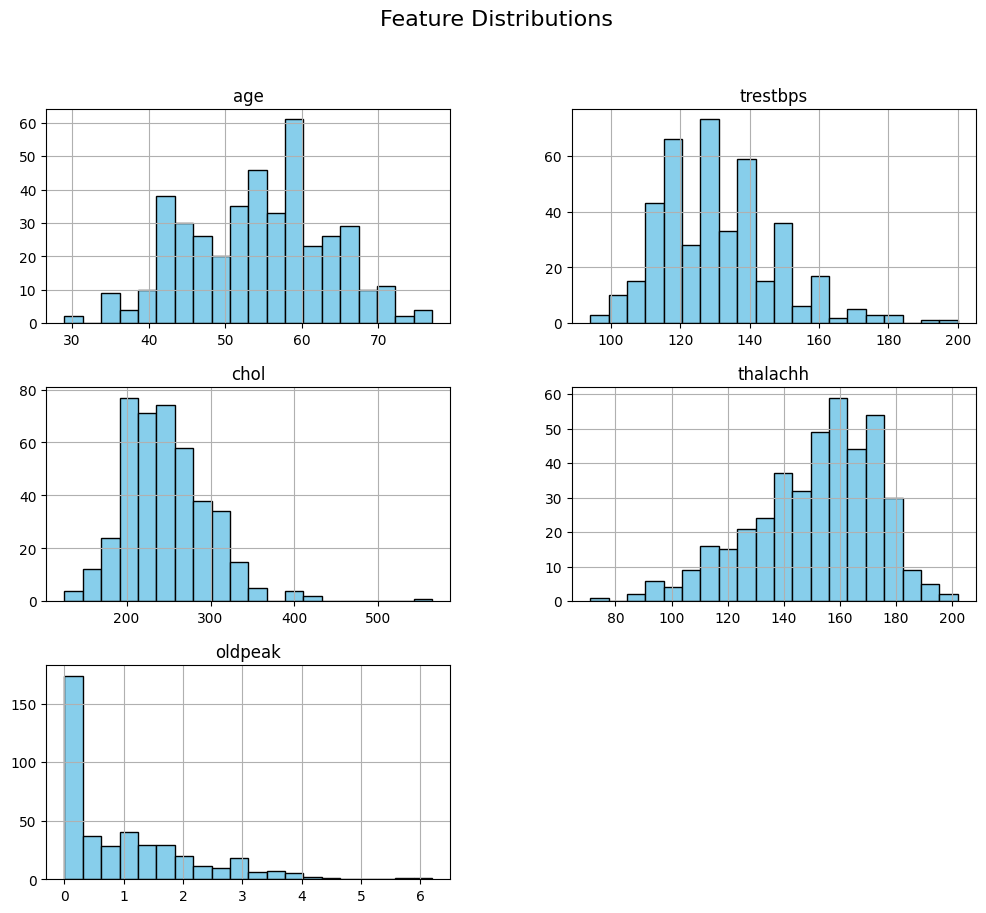

In [ ]:
# Create histograms for numerical variables, specifying the plot size, number of bins, and colors
df[numeric_variables].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

# Add a main title to the plot
plt.suptitle('Feature Distributions', fontsize=16)

# Display the plot
plt.show()

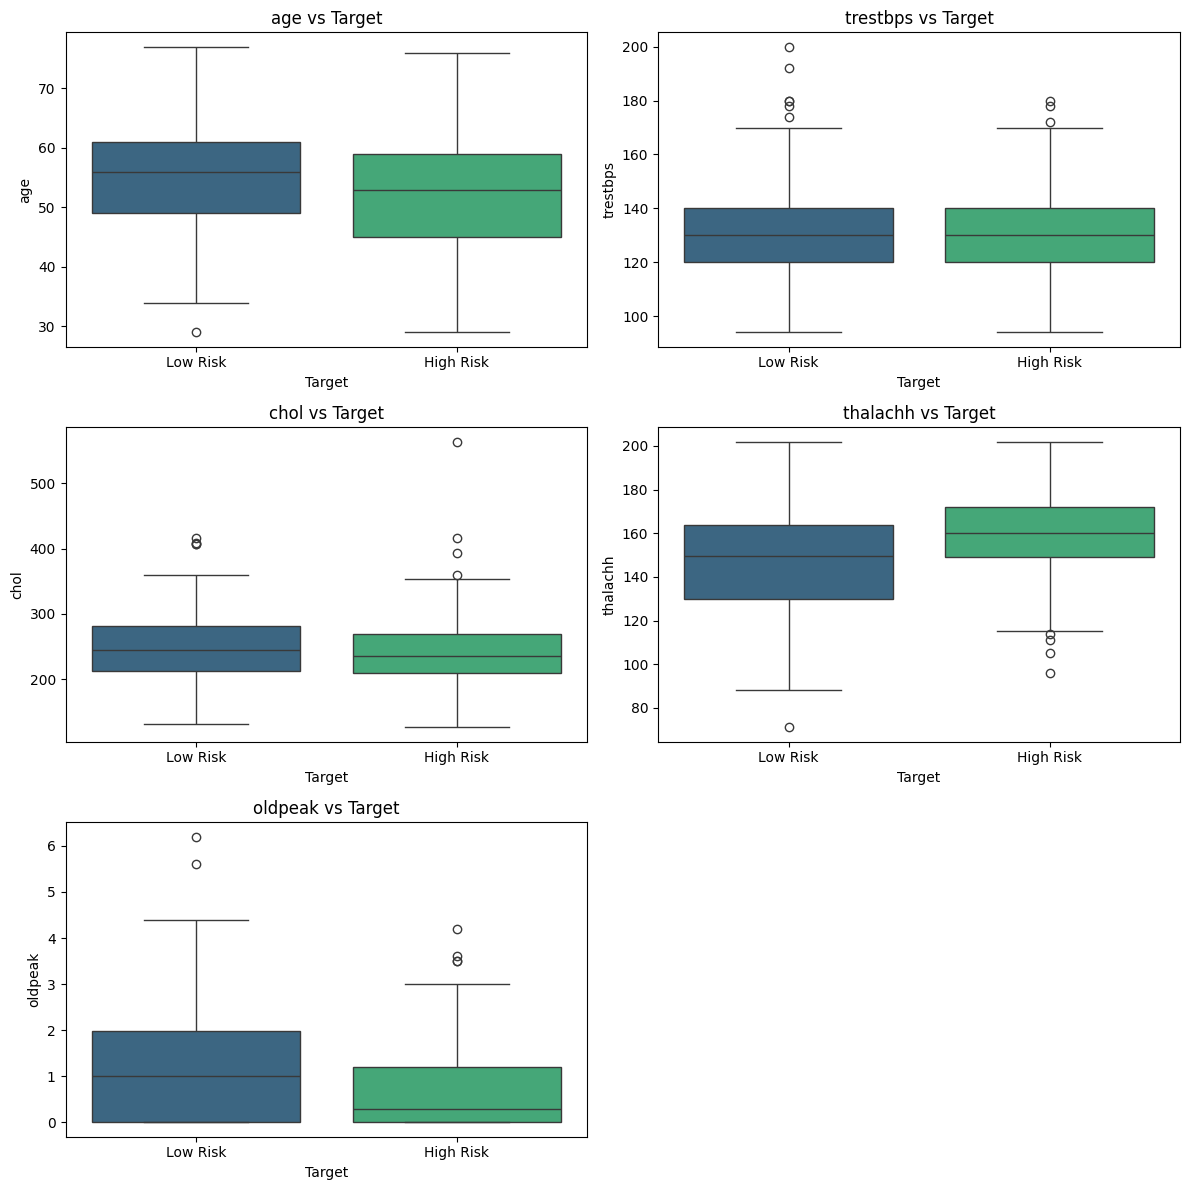

In [ ]:
# Number of columns and rows for the plot grid
n_cols = 2
n_rows = (len(numeric_variables) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Create the plots in the grid, specifying the plot size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # Adjust the height to reduce gaps
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create a boxplot for each numerical feature
for i, feature in enumerate(numeric_variables):
    ax = axes[i]
    sns.boxplot(x='target', y=feature, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{feature} vs Target')
    ax.set_xlabel('Target')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Low Risk', 'High Risk'])

# Hide unused subplots
for j in range(len(numeric_variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust space between plots
plt.tight_layout()
plt.show()

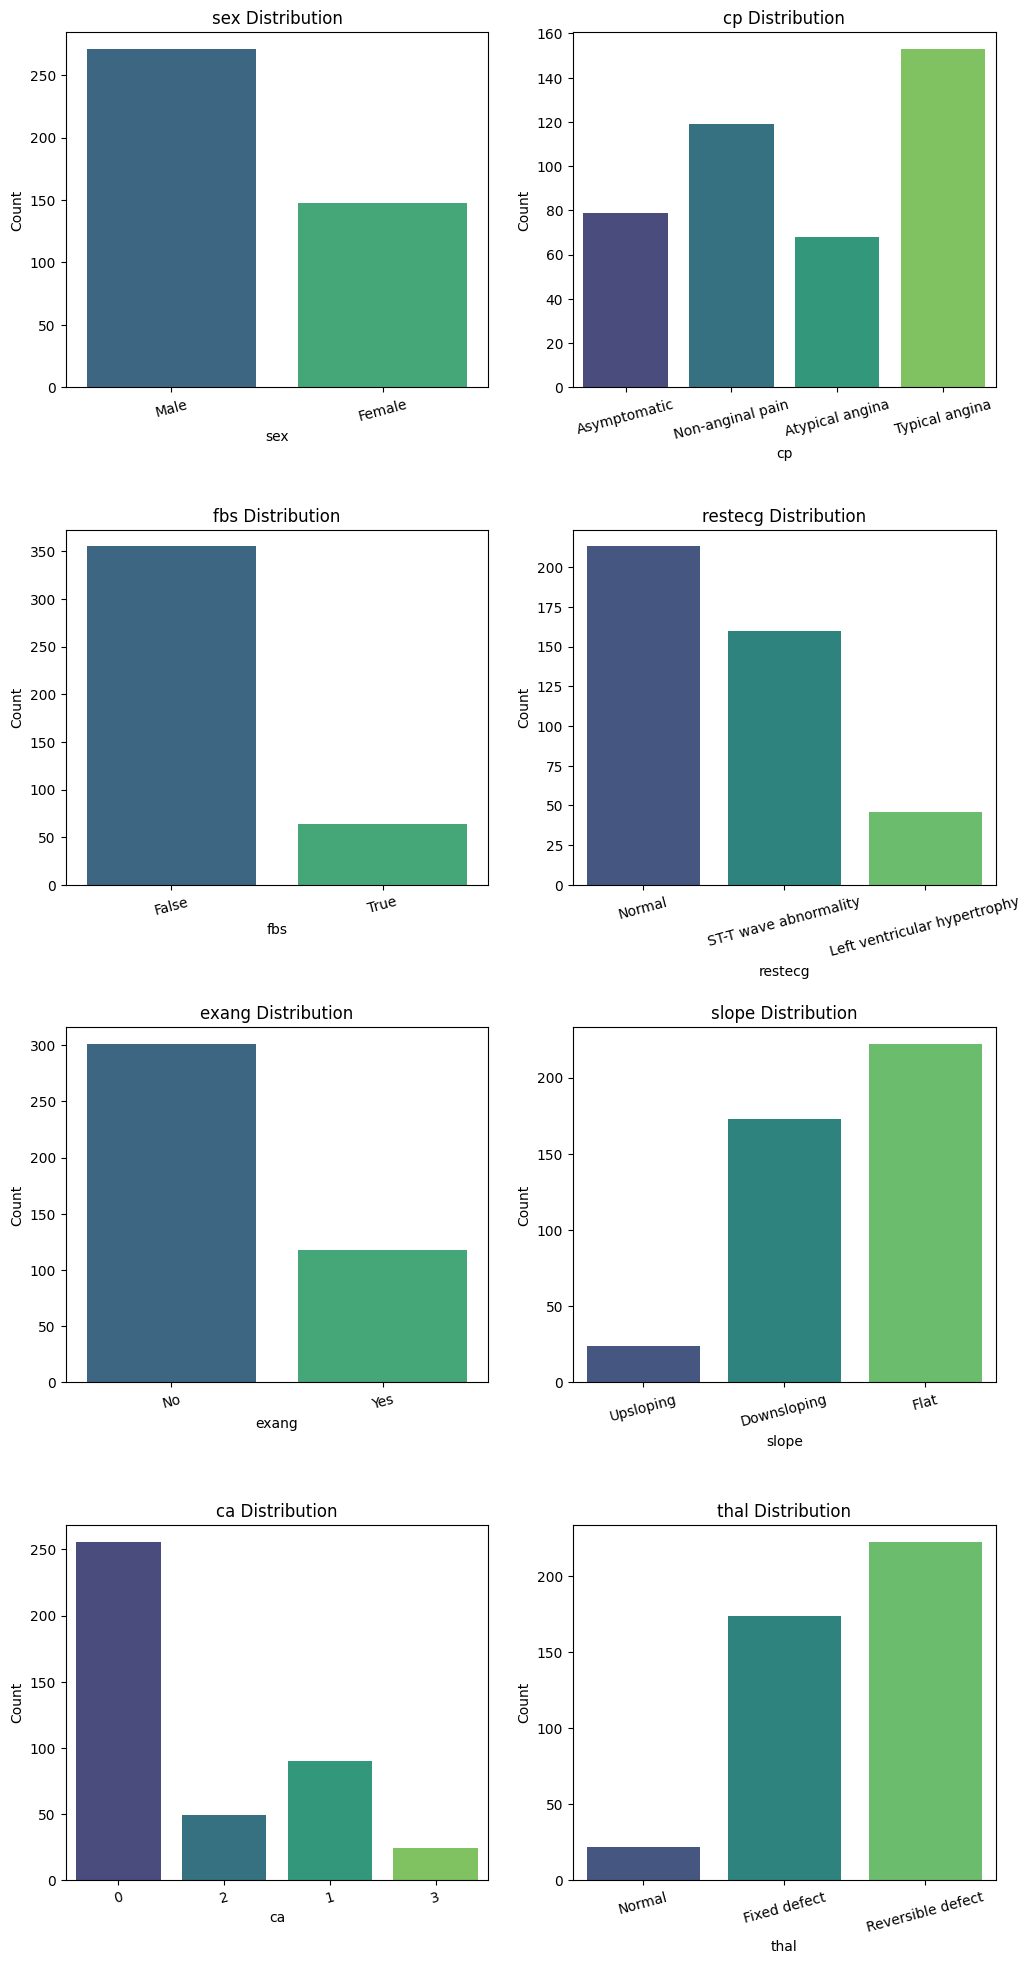

In [ ]:
# Number of columns and rows for the plot grid
n_cols = 2
n_rows = (len(categorical_variables) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Create plots for categorical variables
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))  # Adjust the plot size
fig.subplots_adjust(hspace=0.4)  # Adjust space between plots
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create a bar plot for each categorical variable
for i, variable in enumerate(categorical_variables):
    ax = axes[i]
    sns.countplot(x=variable, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{variable} Distribution')
    ax.set_xlabel(variable)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
    ax.set_ylabel('Count')

# Hide unused subplots
for j in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[j])

plt.show()

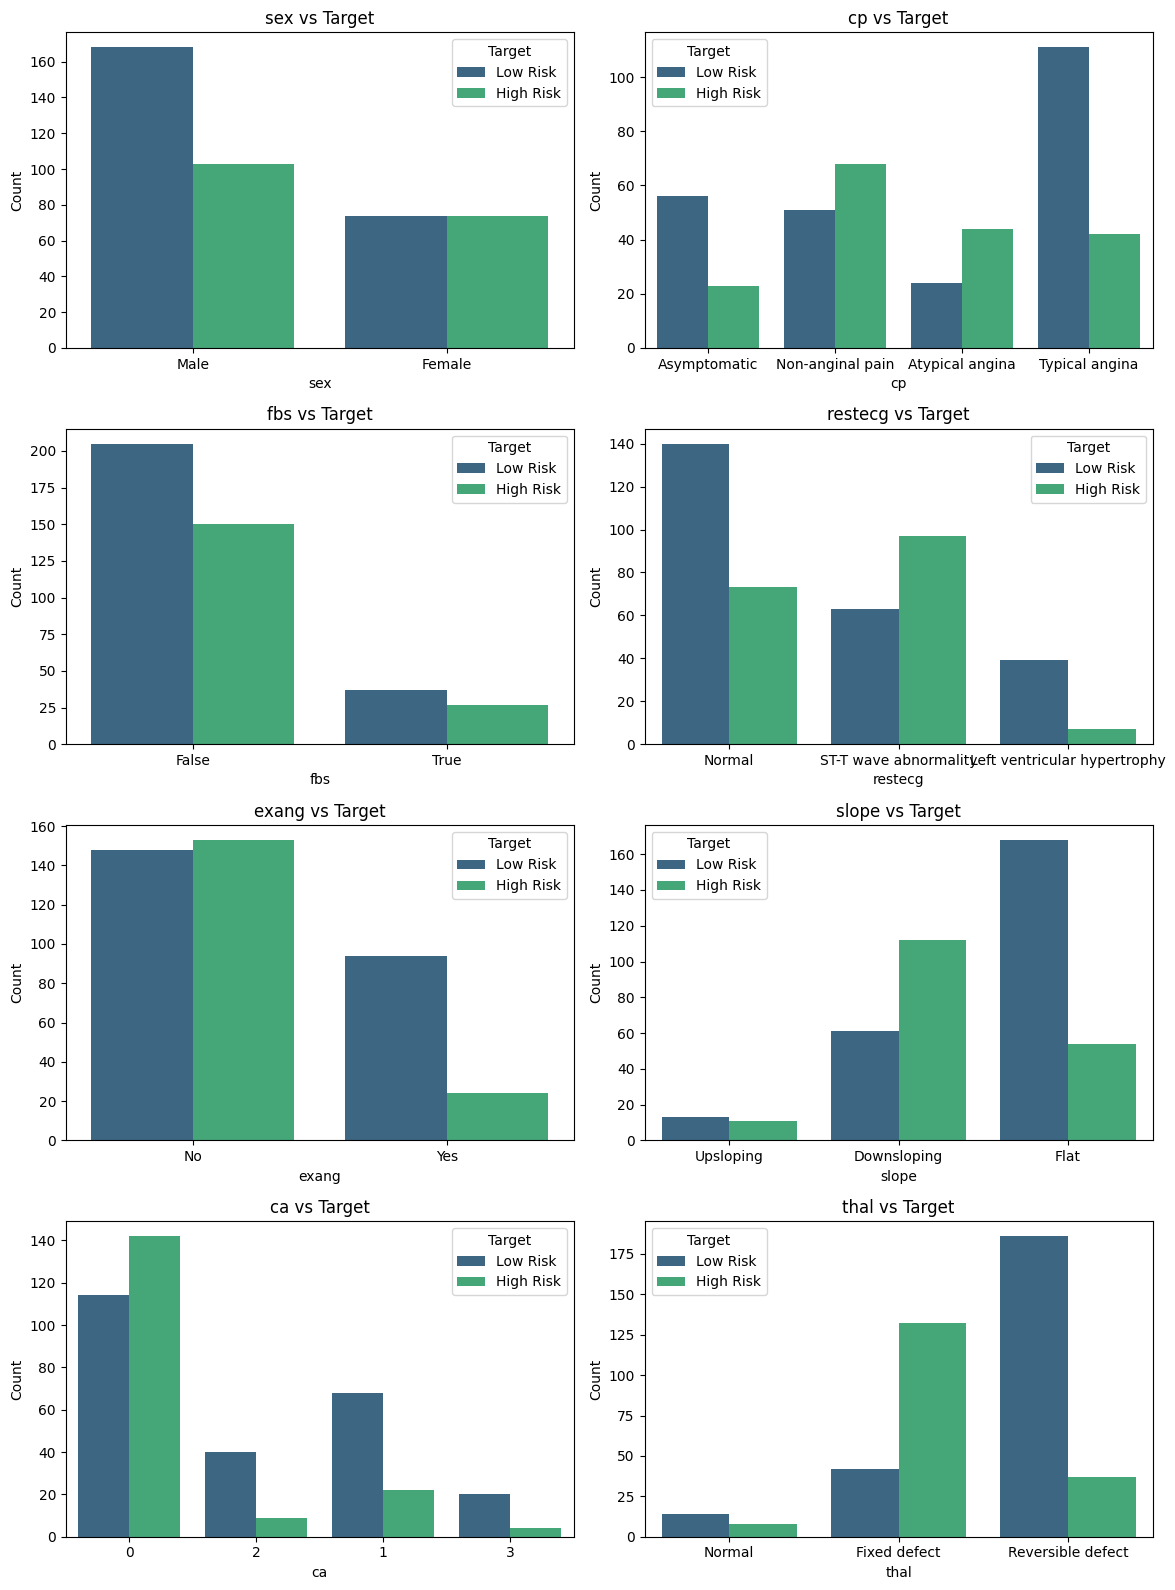

In [ ]:
# Number of rows and columns for the plot grid
n_rows = (len(categorical_variables) + n_cols - 1) // n_cols  # Calculate the required number of rows

# Create plots for categorical variables, considering the target variable
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # Adjust the height of the plots to reduce space
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Create a bar plot for each categorical variable, distinguishing by target variable
for i, feature in enumerate(categorical_variables):
    ax = axes[i]
    sns.countplot(x=feature, hue='target', data=df, palette='viridis', ax=ax)
    ax.set_title(f'{feature} vs Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Update legend labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Low Risk', 'High Risk'], title='Target')

# Hide unused subplots
for j in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust space between the plots
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [ ]:
# Creating dummy variables
df = pd.get_dummies(df, drop_first=True)  # Drop the first category to avoid the dummy variable trap

# Splitting features and target variable
X = df.drop(columns=['target'])  # Independent variables (features)
y = df['target']  # Dependent variable (target)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)  # 30% for testing

## **Model Training**

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Model Parameters:
+-------------------+-------+
|   Hyperparameter  | Value |
+-------------------+-------+
|     max_depth     |   20  |
|    max_features   |  log2 |
|  min_samples_leaf |   12  |
| min_samples_split |   35  |
|    n_estimators   |   51  |
+-------------------+-------+

Feature Importance (Training Set):
+----------+------------+
| Feature  | Importance |
+----------+------------+
|    cp    |   0.1731   |
|   thal   |   0.1711   |
|  slope   |   0.1329   |
|    ca    |   0.1074   |
| thalachh |   0.0943   |
| oldpeak  |   0.0773   |
|  exang   |   0.0701   |
|   age    |   0.0558   |
| trestbps |   0.0336   |
|   chol   |   0.0324   |
| restecg  |   0.0264   |
|   sex    |   0.0231   |
|   fbs    |   0.0024   |
+----------+------------+

Model Evaluation - Training Set:
+-----------+--------------+
|   Metric  | Training Set |
+-----------+--------------+
|  Accuracy |    0.9092    |
| Precision |   

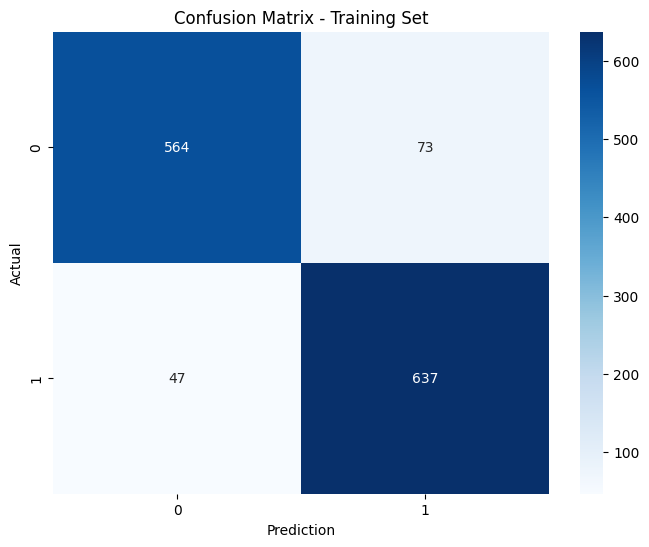

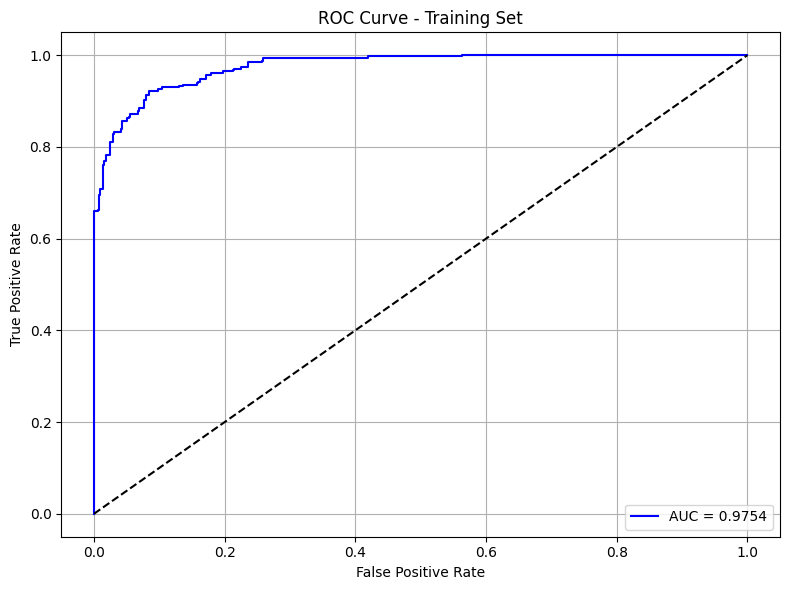

In [ ]:
# Initializing the model
rf = RandomForestClassifier(random_state=42)

# Model parameters
param_dist_rf = {
    'n_estimators': randint(50, 100),  # Number of trees in the random forest
    'max_depth': [5, 10, 15, 20],  # Depth of the trees
    'min_samples_split': randint(30, 40),  # Minimum samples required to split a node
    'min_samples_leaf': randint(10, 20),  # Minimum samples required at a leaf
    'max_features': ['sqrt', 'log2']  # Number of features to consider for each split
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,  # Number of parameter combinations to try
    scoring='recall',  # Model evaluation metric
    cv=5,  # Number of folds in cross-validation
    random_state=42,  # Setting the random state for reproducibility
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Level of information displayed during the process
)

# Fitting the model to the training data
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Displaying best parameters in a table
params_table = PrettyTable()
params_table.field_names = ["Hyperparameter", "Value"]
for param, value in best_params.items():
    params_table.add_row([param, value])

print("\nBest Model Parameters:")
print(params_table)

# Calculating feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Pairing and sorting in descending order
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Creating the table
table = PrettyTable()
table.field_names = ["Feature", "Importance"]

# Adding data to the table
for feature, importance in feature_importance:
    table.add_row([feature, f"{importance:.4f}"])

# Displaying the table
print("\nFeature Importance (Training Set):")
print(table)

# Predictions on the training set
y_train_pred = best_rf.predict(X_train)
y_train_prob = best_rf.predict_proba(X_train)[:, 1]

# Metrics for the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_prob)

# Metrics table
metrics_table = PrettyTable()
metrics_table.field_names = ["Metric", "Training Set"]
metrics_table.add_row(["Accuracy", f"{accuracy_train:.4f}"])
metrics_table.add_row(["Precision", f"{precision_train:.4f}"])
metrics_table.add_row(["Recall", f"{recall_train:.4f}"])
metrics_table.add_row(["F1 Score", f"{f1_train:.4f}"])
metrics_table.add_row(["AUC ROC", f"{auc_train:.4f}"])

# Displaying the metrics table
print("\nModel Evaluation - Training Set:")
print(metrics_table)

# Confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# ROC curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'AUC = {roc_auc_train:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Model Testing**


Model Evaluation - Test Set:
+-----------+----------+
|   Metric  | Test Set |
+-----------+----------+
|  Accuracy |  0.8483  |
| Precision |  0.8328  |
|   Recall  |  0.8840  |
|  F1 Score |  0.8576  |
|  AUC ROC  |  0.9464  |
+-----------+----------+


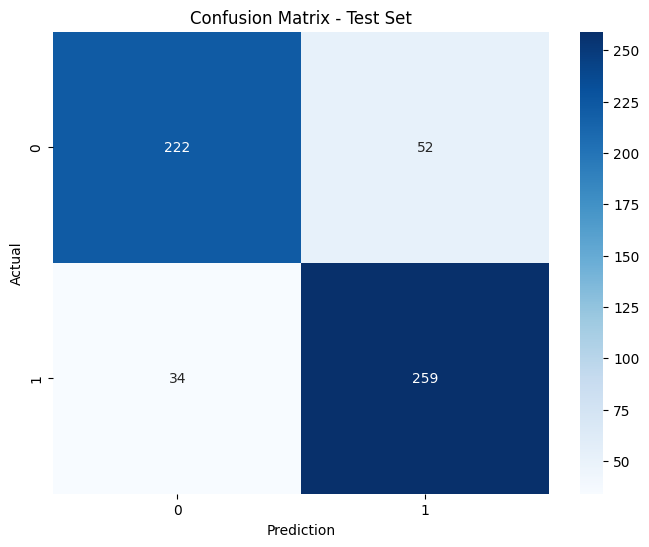

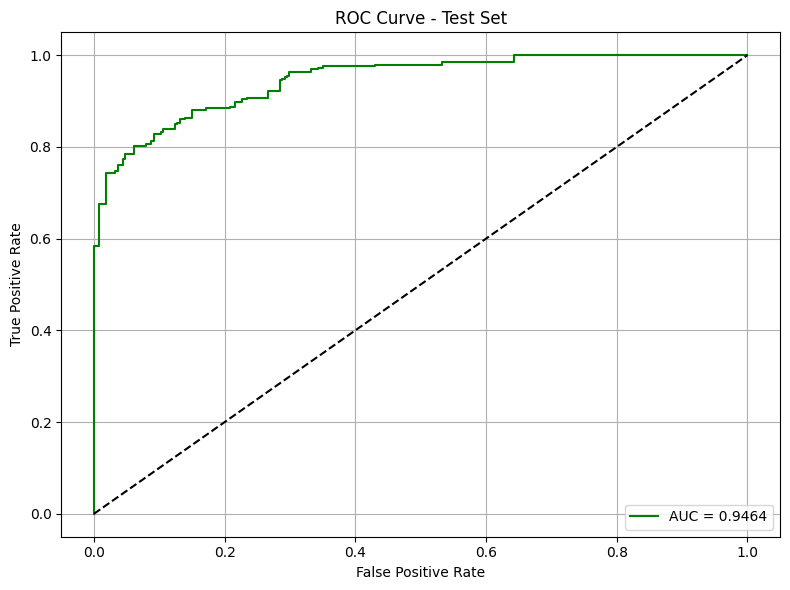

In [ ]:
# Predictions on the test set
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# Metrics - test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_prob)

# Metrics table - test set
metrics_test_table = PrettyTable()
metrics_test_table.field_names = ["Metric", "Test Set"]
metrics_test_table.add_row(["Accuracy", f"{accuracy_test:.4f}"])
metrics_test_table.add_row(["Precision", f"{precision_test:.4f}"])
metrics_test_table.add_row(["Recall", f"{recall_test:.4f}"])
metrics_test_table.add_row(["F1 Score", f"{f1_test:.4f}"])
metrics_test_table.add_row(["AUC ROC", f"{auc_test:.4f}"])

# Display the table
print("\nModel Evaluation - Test Set:")
print(metrics_test_table)

# Confusion matrix on the test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_test:.4f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Summary**

Comparison of Metrics on Training and Test Sets:
+-----------+--------------+----------+------------+
|   Metric  | Training Set | Test Set | Difference |
+-----------+--------------+----------+------------+
|  Accuracy |    0.9092    |  0.8483  |   0.0608   |
| Precision |    0.8972    |  0.8328  |   0.0644   |
|   Recall  |    0.9313    |  0.8840  |   0.0473   |
|  F1 Score |    0.9139    |  0.8576  |   0.0563   |
|  AUC ROC  |    0.9754    |  0.9464  |   0.0290   |
+-----------+--------------+----------+------------+
/n


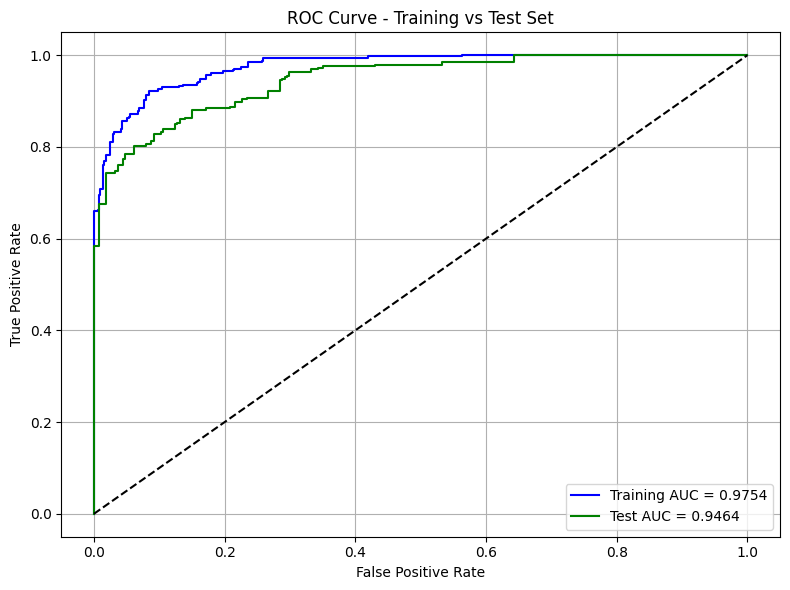

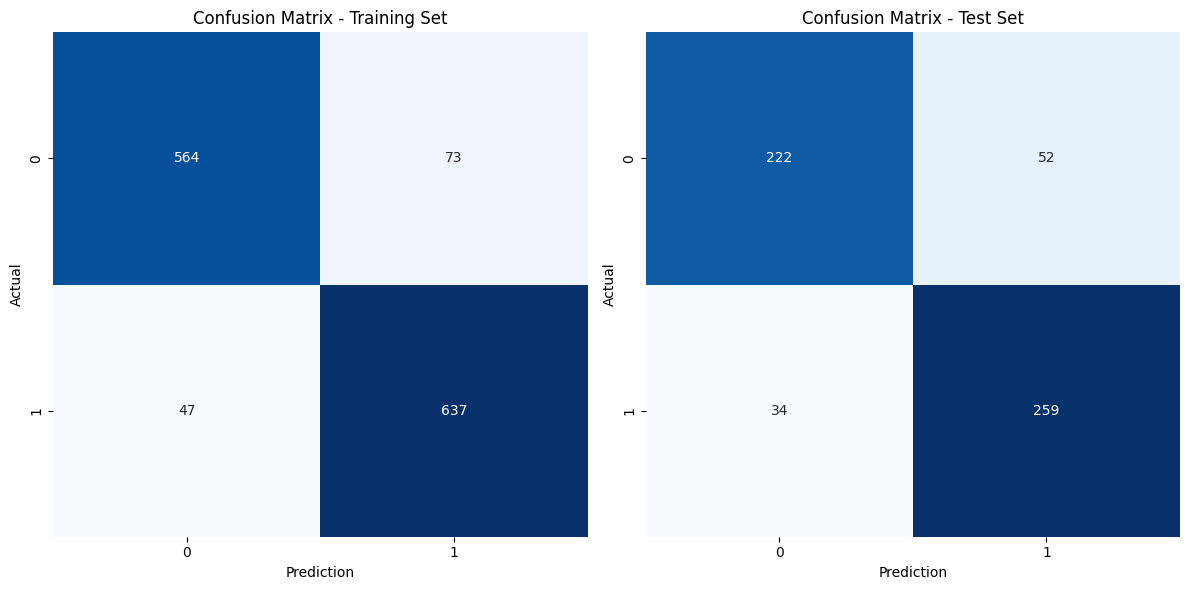

In [ ]:
# Defined metrics
train_metrics = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1 Score': f1_score(y_train, y_train_pred),
    'AUC ROC': roc_auc_score(y_train, y_train_prob)
}

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'AUC ROC': roc_auc_score(y_test, y_test_prob)
}

# Create table
table = PrettyTable()
table.field_names = ["Metric", "Training Set", "Test Set", "Difference"]
for metric in train_metrics.keys():
    train_val = train_metrics[metric]
    test_val = test_metrics[metric]
    diff = abs(train_val - test_val)
    table.add_row([metric, f"{train_val:.4f}", f"{test_val:.4f}", f"{diff:.4f}"])

# Display the table
print("Comparison of Metrics on Training and Test Sets:")
print(table)
print('/n')

# Plot ROC curve with two curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training AUC = {roc_auc_train:.4f}', color='blue')  # ROC curve - training
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.4f}', color='green')  # ROC curve - test
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training vs Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix - Training set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Actual')

# Confusion matrix - Test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[1], cbar=False)
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Actual')

plt.tight_layout()  # Adjusting layout of the plots
plt.show()